# 0. T_Introduction to Facebook Prophet

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from fbprophet import Prophet

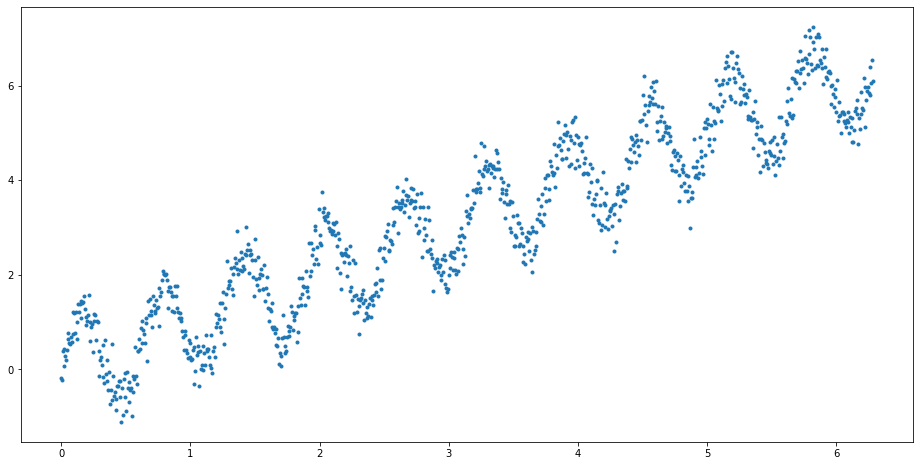

In [117]:
# process data and save it as signal.csv

fig = plt.figure(figsize = (16,8))
t = np.linspace(0,2*np.pi,1000)

start = pd.Timestamp('2015-07-01')
end = pd.Timestamp('2020-08-01')

datetime = np.linspace(start.value, end.value, 1000)
y = np.sin(t*10) + t
y = y + np.random.normal(0, 0.3, 1000)

plt.plot(t,y,'.')


df = pd.DataFrame(data = {'ds':dict(timestamp=pd.to_datetime(datetime))['timestamp']})
df.ds = df.ds.dt.strftime('%Y-%m-%d %H:%M:%S')
df['y'] = y

df.to_csv('Data/sine.csv')

INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


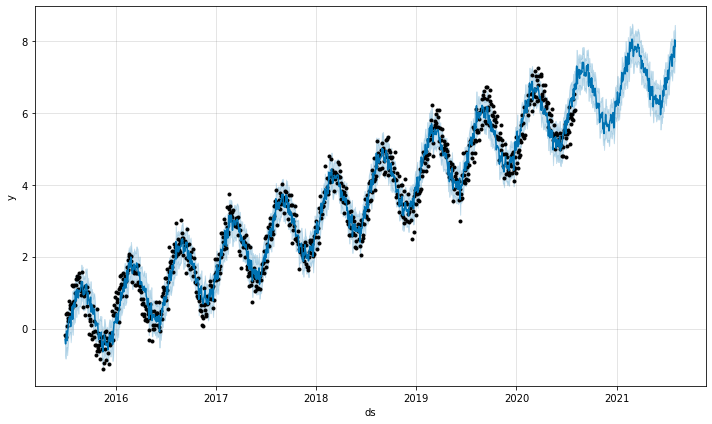

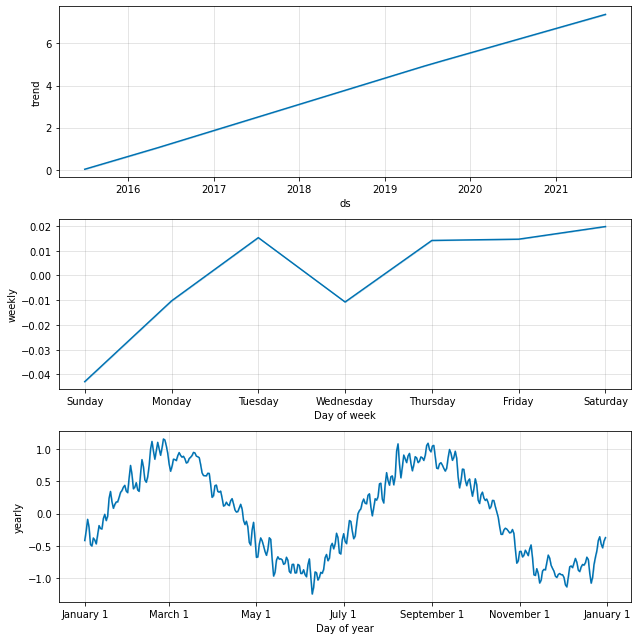

In [143]:
# testing

df = df.sample(frac=1)

m = Prophet(seasonality_prior_scale = 10).add_seasonality(name='yearly',
                                    period=365.25,
                                    fourier_order=100,
                                    prior_scale=0.01,
                                    mode='additive')

m.fit(df)

future = m.make_future_dataframe(periods = 365)

forecast = m.predict(future)

fig1 = m.plot(forecast)

fig1 = m.plot_components(forecast)



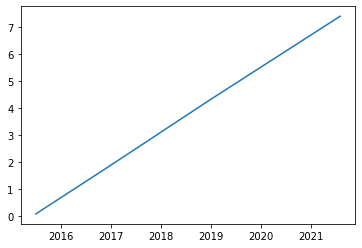

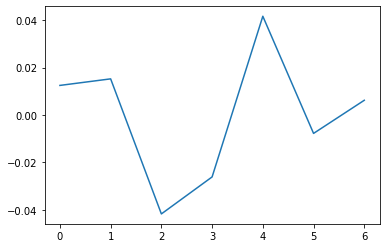

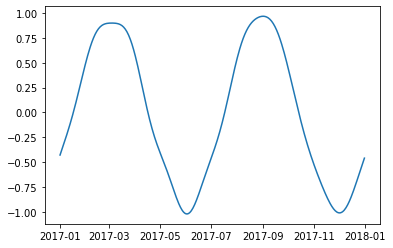

In [63]:
# grab the individual data from plot components

for trend in lines.get_axes():
    x,y = trend.lines[0].get_data()
    plt.plot(x,y)
    plt.show()


(array([datetime.datetime(2015, 7, 1, 0, 0),
        datetime.datetime(2015, 7, 2, 20, 38, 11, 891891),
        datetime.datetime(2015, 7, 4, 17, 16, 23, 783783), ...,
        datetime.datetime(2021, 7, 30, 0, 0),
        datetime.datetime(2021, 7, 31, 0, 0),
        datetime.datetime(2021, 8, 1, 0, 0)], dtype=object),
 array([0.06949703, 0.07560949, 0.08172195, ..., 7.39841244, 7.40167405,
        7.40493566]))

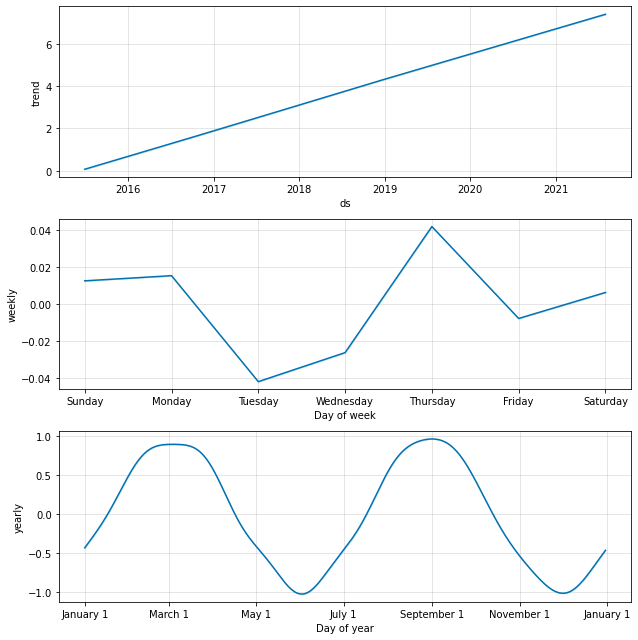

In [49]:
lines = m.plot_components(forecast)

# Trend Values
trend = lines.get_axes()[0]
trend.lines[0].get_data()

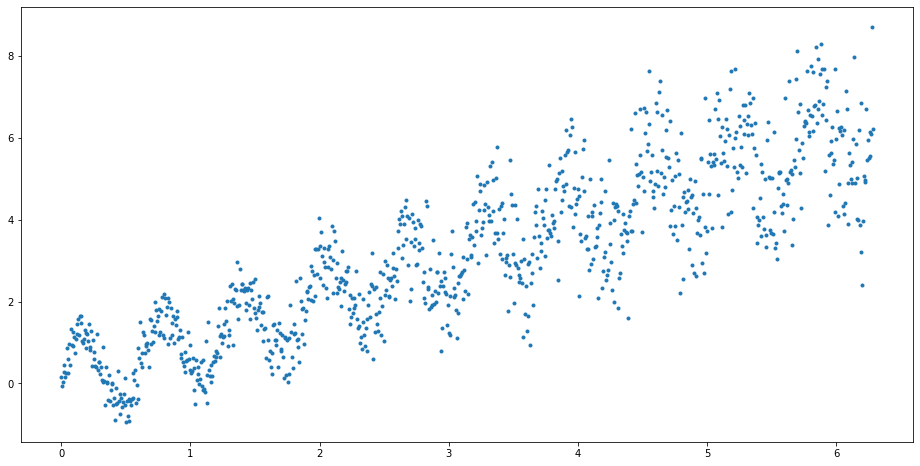

In [129]:
fig = plt.figure(figsize = (16,8))
t = np.linspace(0,2*np.pi,1000)

start = pd.Timestamp('2015-07-01')
end = pd.Timestamp('2020-08-01')

datetime = np.linspace(start.value, end.value, 1000)
y = np.sin(t*10) + t
y = y + np.random.normal(0, [i/1200 for i in range(300,1300)], 1000)

plt.plot(t,y,'.')

df = pd.DataFrame(data = {'ds':dict(timestamp=pd.to_datetime(datetime))['timestamp']})
df.ds = df.ds.dt.strftime('%Y-%m-%d %H:%M:%S')
df['y'] = y

df.to_csv('Data/sine_multiplicative.csv')

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


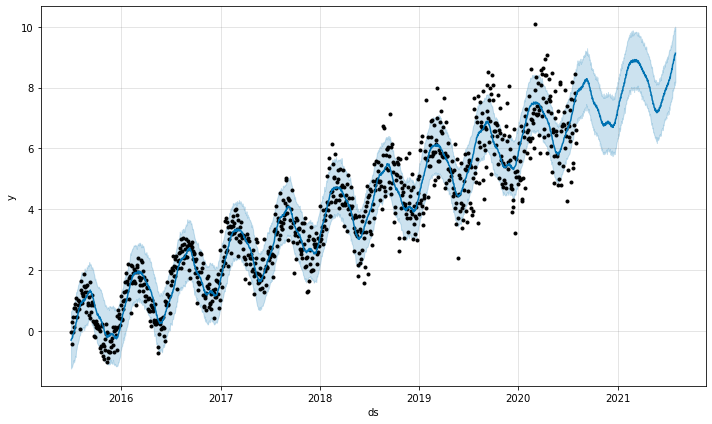

In [127]:
# testing

df = df.sample(frac=1)

m = Prophet()

m.fit(df)

future = m.make_future_dataframe(periods = 365)

forecast = m.predict(future)

fig1 = m.plot(forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


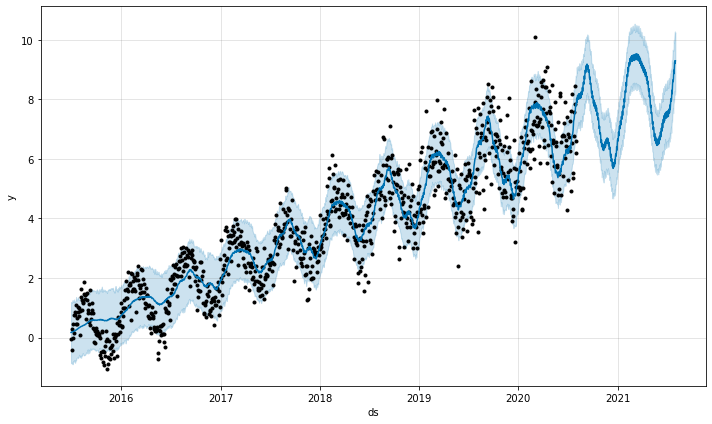

In [128]:
# testing

df = df.sample(frac=1)

m = Prophet(seasonality_mode = 'multiplicative')

m.fit(df)

future = m.make_future_dataframe(periods = 365)

forecast = m.predict(future)

fig1 = m.plot(forecast)



In [130]:
'https://pageviews.toolforge.org/?project=en.wikipedia.org&pages={{FULLPAGENAMEE}}'

SyntaxError: invalid syntax (<ipython-input-130-fbc6aba2a601>, line 1)

# Creating dataset for passengers

In [5]:
path = 'Data/Teaching/airline-passengers.csv'
df = pd.read_csv(path)
df.columns = ['ds','y']
df.to_csv('Data/passengers.csv')
df.head()

,ds,y
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


# Creating holiday data

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


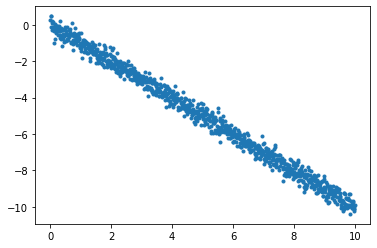

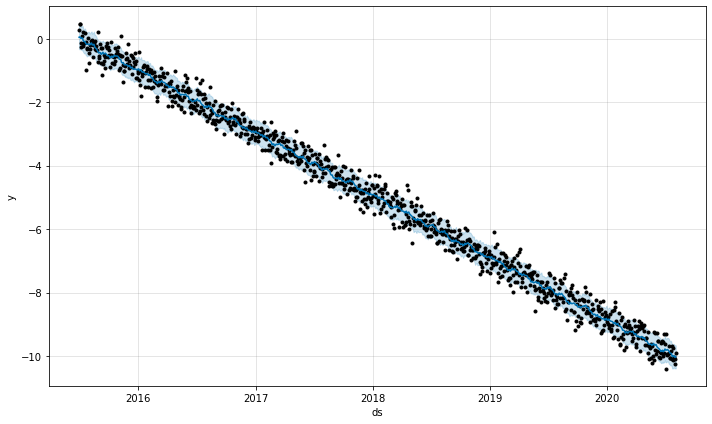

In [110]:
t = np.linspace(0,10,1000)

start = pd.Timestamp('2015-07-01')
end = pd.Timestamp('2020-08-01')

datetime = np.linspace(start.value, end.value, 1000)
y = -t
y = y + np.random.normal(0, 0.3, 1000)

plt.plot(t,y,'.')


df = pd.DataFrame(data = {'ds':dict(timestamp=pd.to_datetime(datetime))['timestamp']})
df.ds = df.ds.dt.strftime('%Y-%m-%d %H:%M:%S')
df['y'] = y

m = Prophet()
forecast = m.fit(df).predict(df)
fig = m.plot(forecast)

In [111]:
eid_fitr = ['2015-07-17','2016-07-06','2017-06-25','2018-06-15','2019-06-05','2020-05-24']
eid_adha = ['2015-09-24','2016-09-10','2017-08-31','2018-08-22','2019-08-12','2020-07-31']

True
True
True
True
True
True


/Users/yousefnami/python_environments/KinKeepers_AI/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


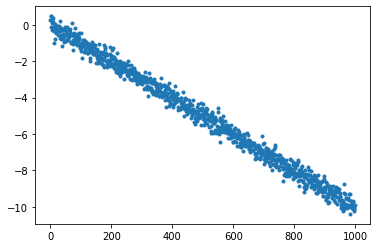

In [112]:
eid_fitr_tf = []
for item in eid_fitr:
    eid_fitr_tf = []
    for time in df.ds:
        if item in time:
            print(True)
            eid_fitr_tf.append(True)
        else:
            eid_fitr_tf.append(False)

    df.y[eid_fitr_tf] = df.y[eid_fitr_tf] + 0.5
    

plt.plot(df.index,df.y,'.')


/Users/yousefnami/python_environments/KinKeepers_AI/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


True
True
True


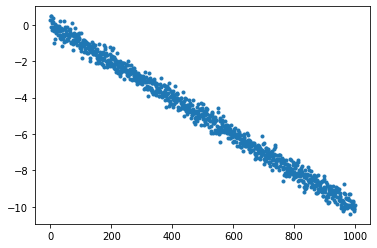

In [113]:


eid_fitr_tf = []
for item in eid_adha:
    eid_fitr_tf = []
    for time in df.ds:
        if item in time:
            print(True)
            eid_fitr_tf.append(True)
        else:
            eid_fitr_tf.append(False)

    df.y[eid_fitr_tf] = df.y[eid_fitr_tf] + 0.5
    

plt.plot(df.index,df.y,'.')



INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


['2015-09-24', '2016-09-10', '2017-08-31', '2018-08-22', '2019-08-12', '2020-07-31']


,holiday,ds,lower_window,upper_window
0,eid_adha,2015-09-24,0,0
1,eid_adha,2016-09-10,0,0
2,eid_adha,2017-08-31,0,0
3,eid_adha,2018-08-22,0,0
4,eid_adha,2019-08-12,0,0
5,eid_adha,2020-07-31,0,0
0,eid_fitr,2015-07-17,0,0
1,eid_fitr,2016-07-06,0,0
2,eid_fitr,2017-06-25,0,0
3,eid_fitr,2018-06-15,0,0


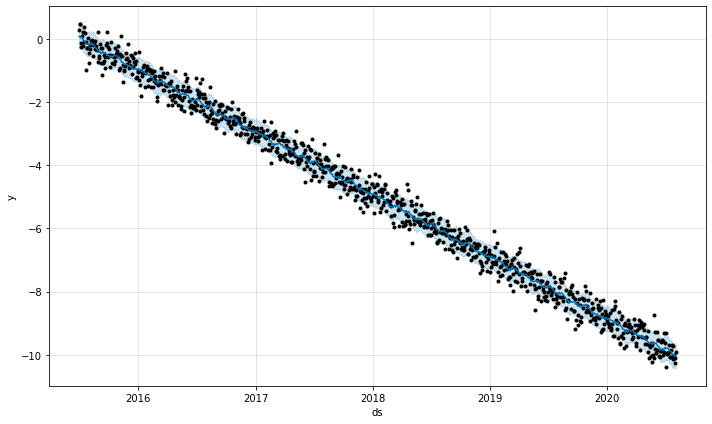

In [114]:
print(eid_adha)
eid1 = pd.DataFrame({
  'holiday': 'eid_adha',
  'ds': pd.to_datetime(eid_adha),
  'lower_window': 0,
  'upper_window': 0,
})

eid2 = pd.DataFrame({
  'holiday': 'eid_fitr',
  'ds': pd.to_datetime(eid_fitr),
  'lower_window': 0,
  'upper_window': 0,
})

holidays = pd.concat((eid1, eid2))

#holidays['prior_scale'] = 10000

m = Prophet(holidays = holidays, holidays_prior_scale= 10000)
forecast = m.fit(df).predict(df)
fig = m.plot(forecast)
holidays

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


['2015-09-24', '2016-09-10', '2017-08-31', '2018-08-22', '2019-08-12', '2020-07-31']


,holiday,ds,lower_window,upper_window
0,eid_adha,2015-09-24,0,0
1,eid_adha,2016-09-10,0,0
2,eid_adha,2017-08-31,0,0
3,eid_adha,2018-08-22,0,0
4,eid_adha,2019-08-12,0,0
5,eid_adha,2020-07-31,0,0
0,eid_fitr,2015-07-17,0,0
1,eid_fitr,2016-07-06,0,0
2,eid_fitr,2017-06-25,0,0
3,eid_fitr,2018-06-15,0,0


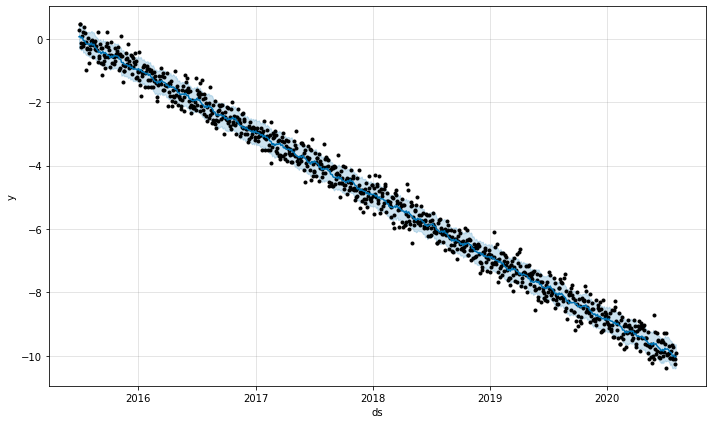

In [115]:
print(eid_adha)
eid1 = pd.DataFrame({
  'holiday': 'eid_adha',
  'ds': pd.to_datetime(eid_adha),
  'lower_window': 0,
  'upper_window': 0,
})

eid2 = pd.DataFrame({
  'holiday': 'eid_fitr',
  'ds': pd.to_datetime(eid_fitr),
  'lower_window': 0,
  'upper_window': 0,
})

holidays = pd.concat((eid1, eid2))

#holidays['prior_scale'] = 10000

m = Prophet(holidays = holidays, holidays_prior_scale= 0.1)
forecast = m.fit(df).predict(df)
fig = m.plot(forecast)
holidays